In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib
import requests
import plotly.express as px
#from configNW import apiKey
apiKey = "ded82615dea91e8275f9c9c08648e98e012334a2"
import matplotlib.colors as colors
from urllib.request import urlopen
import json
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
#%matplotlib


### Economic Census 2017

In [15]:
# get data from econmic survey data by in NYS by place
def get_request(url, parameters = {}):
    return requests.get(url, params = parameters)
url = "https://api.census.gov/data/2017/ecnbasic"
params = {
            "get": "NAICS2017_LABEL,NAICS2017,GEO_ID,EMP,NAME,FIRM,RCPTOT,RCPTOT_IMP",
            "for": "place:*",
            "in": "state:36",
            "key": apiKey
        }
res = get_request(url, params).json()
econ = pd.DataFrame(res[1:], columns = res[0])
# abscb["EMP"] = abscb["EMP"].astype("int64")
# abscb["PAYANN"] = abscb["PAYANN"].astype("int64")
# abscb["PAYANN_PCT"] = abscb["PAYANN_PCT"].astype(float)
# abscb["EMP_PCT"] = abscb["EMP_PCT"].astype(float)
# # avg annual pay by race in the united states
# abscb["Mean Annual Pay Per Employee"] = round((abscb["PAYANN"]/abscb["EMP"])*1000, 0)
# #abscb["STATE"] = abscb["STATE"].astype(int)
econ.head()

,NAICS2017_LABEL,NAICS2017,GEO_ID,EMP,NAME,FIRM,RCPTOT,RCPTOT_IMP,state,place
0,Retail trade,44-45,E600000US3609978553,478,"Waterloo village, New York",17,95106,0,36,78553
1,Health and personal care stores,446,E600000US3609978553,0,"Waterloo village, New York",0,0,0,36,78553
2,Health and personal care stores,4461,E600000US3609978553,0,"Waterloo village, New York",0,0,0,36,78553
3,Clothing and clothing accessories stores,448,E600000US3609978553,93,"Waterloo village, New York",6,7075,0,36,78553
4,Clothing stores,4481,E600000US3609978553,0,"Waterloo village, New York",0,0,0,36,78553


In [16]:
econ["COUNTY"] = econ["GEO_ID"].apply(lambda x: x[11:14])
nyc_place = econ[econ["COUNTY"].isin(['005', '081', '047', '061', '085'])]

In [17]:
econ["COUNTY"].unique()

array(['099', '101', '103', '121', '123', '057', '063', '065', '067',
       '069', '071', '037', '027', '033', '013', '031', '001', '003',
       '007', '009', '011', '053', '015', '017', '019', '021', '023',
       '025', '029', '073', '075', '115', '117', '107', '077', '079',
       '083', '089', '091', '095', '097', '035', '039', '043', '045',
       '049', '051', '055', '041', '087', '093', '119', '109', '111',
       '113', '105', '059', '000'], dtype=object)

In [18]:
nyc_place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAICS2017_LABEL  0 non-null      object
 1   NAICS2017        0 non-null      object
 2   GEO_ID           0 non-null      object
 3   EMP              0 non-null      object
 4   NAME             0 non-null      object
 5   FIRM             0 non-null      object
 6   RCPTOT           0 non-null      object
 7   RCPTOT_IMP       0 non-null      object
 8   state            0 non-null      object
 9   place            0 non-null      object
 10  COUNTY           0 non-null      object
dtypes: object(11)
memory usage: 0.0+ bytes


In [72]:
# get data from economic survey data in NYS by county
def get_request(url, parameters = {}):
    return requests.get(url, params = parameters)
url = "https://api.census.gov/data/2017/ecnbasic"
params = {
            "get": "NAICS2017_LABEL,NAICS2017,GEO_ID,EMP,NAME,FIRM,RCPTOT,RCPTOT_F,PAYANN,SECTOR",
            "for": "county:*",
            "in": "state:36",
            "key": apiKey
        }
res = get_request(url, params).json()
econ = pd.DataFrame(res[1:], columns = res[0])
# abscb["EMP"] = abscb["EMP"].astype("int64")
# abscb["PAYANN"] = abscb["PAYANN"].astype("int64")
# abscb["PAYANN_PCT"] = abscb["PAYANN_PCT"].astype(float)
# abscb["EMP_PCT"] = abscb["EMP_PCT"].astype(float)
# # avg annual pay by race in the united states
# abscb["Mean Annual Pay Per Employee"] = round((abscb["PAYANN"]/abscb["EMP"])*1000, 0)
# #abscb["STATE"] = abscb["STATE"].astype(int)
econ.head()

NYC = econ[(econ["NAME"] == "New York County, New York") | (econ["NAME"] == "Kings County, New York") | (econ["NAME"] == "Queens County, New York") |
                    (econ["NAME"] == "Bronx County, New York") | (econ["NAME"] == "Richmond County, New York")]

In [73]:
NYC.head(10)

,NAICS2017_LABEL,NAICS2017,GEO_ID,EMP,NAME,FIRM,RCPTOT,RCPTOT_F,PAYANN,SECTOR,state,county
198,Manufacturing,31-33,0500000US36005,6037,"Bronx County, New York",311,1599986,None,249140,31,36,005
199,Food manufacturing,311,0500000US36005,1957,"Bronx County, New York",86,422954,None,64062,31,36,005
200,Beverage and tobacco product manufacturing,312,0500000US36005,26,"Bronx County, New York",5,17725,None,2119,31,36,005
201,Textile product mills,314,0500000US36005,56,"Bronx County, New York",0,0,D,2253,31,36,005
202,Apparel manufacturing,315,0500000US36005,89,"Bronx County, New York",0,0,D,2044,31,36,005
203,Wood product manufacturing,321,0500000US36005,53,"Bronx County, New York",0,0,D,1914,31,36,005
204,Paper manufacturing,322,0500000US36005,0,"Bronx County, New York",0,0,D,0,31,36,005
205,Printing and related support activities,323,0500000US36005,127,"Bronx County, New York",28,21594,None,6046,31,36,005
206,Chemical manufacturing,325,0500000US36005,485,"Bronx County, New York",13,450590,None,19017,31,36,005
207,Plastics and rubber products manufacturing,326,0500000US36005,660,"Bronx County, New York",10,84531,None,20408,31,36,005


In [74]:
NYC = NYC.drop_duplicates(subset = ["NAICS2017_LABEL", "NAME"])

In [75]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814 entries, 198 to 15344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAICS2017_LABEL  2814 non-null   object
 1   NAICS2017        2814 non-null   object
 2   GEO_ID           2814 non-null   object
 3   EMP              2814 non-null   object
 4   NAME             2814 non-null   object
 5   FIRM             2814 non-null   object
 6   RCPTOT           2814 non-null   object
 7   RCPTOT_F         780 non-null    object
 8   PAYANN           2814 non-null   object
 9   SECTOR           2814 non-null   object
 10  state            2814 non-null   object
 11  county           2814 non-null   object
dtypes: object(12)
memory usage: 285.8+ KB


In [71]:
NYC

,NAICS2017_LABEL,NAICS2017,GEO_ID,EMP,NAME,FIRM,RCPTOT,RCPTOT_F,PAYANN,SECTOR,state,county
195,Apparel manufacturing,315,0500000US36005,89,"Bronx County, New York",0,0,D,2044,31,36,005
199,Manufacturing,31-33,0500000US36005,6037,"Bronx County, New York",311,1599986,None,249140,31,36,005
200,Food manufacturing,311,0500000US36005,1957,"Bronx County, New York",86,422954,None,64062,31,36,005
201,Beverage and tobacco product manufacturing,312,0500000US36005,26,"Bronx County, New York",5,17725,None,2119,31,36,005
202,Textile product mills,314,0500000US36005,56,"Bronx County, New York",0,0,D,2253,31,36,005
...,...,...,...,...,...,...,...,...,...,...,...,...
15316,Other grantmaking and giving services,813219,0500000US36085,0,"Richmond County, New York",0,0,D,0,81,36,085
15317,Social advocacy organizations,8133,0500000US36085,78,"Richmond County, New York",9,6065,None,1999,81,36,085
15319,"Business, professional, labor, political, and ...",8139,0500000US36085,190,"Richmond County, New York",65,31697,None,6417,81,36,085
15320,Business associations,81391,0500000US36085,37,"Richmond County, New York",5,2873,None,1024,81,36,085


In [62]:
nyc_real_estate = NYC[NYC["SECTOR"] == "53"]
nyc_real_estate[nyc_real_estate["NAME"] == "New York County, New York"].head(20)

,NAICS2017_LABEL,NAICS2017,GEO_ID,EMP,NAME,FIRM,RCPTOT,RCPTOT_F,PAYANN,SECTOR,state,county
8177,Real estate and rental and leasing,53,0500000US36061,84318,"New York County, New York",8761,40972330,None,6325917,53,36,061
8178,Real estate,531,0500000US36061,78198,"New York County, New York",8511,36756225,None,5821843,53,36,061
8179,Lessors of real estate,5311,0500000US36061,38282,"New York County, New York",5026,26709476,None,2426041,53,36,061
8180,Lessors of residential buildings and dwellings,53111,0500000US36061,20193,"New York County, New York",3637,9967802,None,944541,53,36,061
8181,Lessors of residential buildings and dwellings,531110,0500000US36061,20193,"New York County, New York",3637,9967802,None,944541,53,36,061
8182,Lessors of nonresidential buildings (except mi...,531120,0500000US36061,17276,"New York County, New York",1333,16238115,None,1414397,53,36,061
8183,Offices of real estate agents and brokers,5312,0500000US36061,11055,"New York County, New York",1097,4640368,None,1103580,53,36,061
8184,Lessors of nonresidential buildings (except mi...,53112,0500000US36061,17276,"New York County, New York",1333,16238115,None,1414397,53,36,061
8185,Lessors of miniwarehouses and self-storage units,53113,0500000US36061,234,"New York County, New York",19,160964,None,13552,53,36,061
8186,Lessors of miniwarehouses and self-storage units,531130,0500000US36061,234,"New York County, New York",19,160964,None,13552,53,36,061


In [54]:
NYC["county"].unique()

array(['005', '081', '047', '061', '085'], dtype=object)

In [55]:
industry_list = ['Real estate property managers', 'Residential property managers',
       'Rental and leasing services', 'Services to buildings and dwellings',
	'Health care and social assistance', 'Accommodation and food services', 'Accommodation',
       'Food services and drinking places', 'Special food services',
       'Restaurants and other eating places', 'Social advocacy organizations', 
	'Civic and social organizations']

industry = NYC[NYC["NAICS2017_LABEL"].isin(industry_list)]

In [56]:
industry.head()

,NAICS2017_LABEL,NAICS2017,GEO_ID,EMP,NAME,FIRM,RCPTOT,RCPTOT_F,PAYANN,SECTOR,state,county
511,Real estate property managers,53131,0500000US36005,4100,"Bronx County, New York",398,565768,None,184777,53,36,005
512,Residential property managers,531311,0500000US36005,3877,"Bronx County, New York",363,538235,None,170230,53,36,005
517,Rental and leasing services,532,0500000US36005,0,"Bronx County, New York",0,0,D,0,53,36,005
624,Services to buildings and dwellings,5617,0500000US36005,1532,"Bronx County, New York",180,107630,None,41593,56,36,005
692,Health care and social assistance,62,0500000US36005,108072,"Bronx County, New York",1808,13367520,None,5550051,62,36,005


In [24]:
econ["NAICS2017_LABEL"].unique()

array(['Utilities', 'Manufacturing', 'Food manufacturing',
       'Wood product manufacturing',
       'Plastics and rubber products manufacturing',
       'Fabricated metal product manufacturing',
       'Machinery manufacturing', 'Retail trade',
       'Motor vehicle and parts dealers', 'Automobile dealers',
       'Automotive parts, accessories, and tire stores',
       'Automotive parts and accessories stores', 'Tire dealers',
       'Furniture and home furnishings stores',
       'Electronics and appliance stores',
       'Building material and supplies dealers',
       'Building material and garden equipment and supplies dealers',
       'Hardware stores', 'Grocery stores',
       'Other building material dealers', 'Food and beverage stores',
       'Supermarkets and other grocery (except convenience) stores',
       'Pharmacies and drug stores', 'Beer, wine, and liquor stores',
       'Health and personal care stores',
       'Gasoline stations with convenience stores', 'Gasolin

### County Business Patterns 2020

In [25]:
# get data from county business patterns data in NYS by zip
def get_request(url, parameters = {}):
    return requests.get(url, params = parameters)
url = "https://api.census.gov/data/2020/cbp"
params = {
            "get": "NAME,NAICS2017_LABEL,ESTAB,PAYANN,PAYQTR1,EMP",
            "for": "zip code:*",
            #"in": "state:36",
            "key": apiKey
        }
res = get_request(url, params).json()
cbp = pd.DataFrame(res[1:], columns = res[0])
# abscb["EMP"] = abscb["EMP"].astype("int64")
# abscb["PAYANN"] = abscb["PAYANN"].astype("int64")
# abscb["PAYANN_PCT"] = abscb["PAYANN_PCT"].astype(float)
# abscb["EMP_PCT"] = abscb["EMP_PCT"].astype(float)
# # avg annual pay by race in the united states
# abscb["Mean Annual Pay Per Employee"] = round((abscb["PAYANN"]/abscb["EMP"])*1000, 0)
# #abscb["STATE"] = abscb["STATE"].astype(int)
cbp.head()

,NAME,NAICS2017_LABEL,ESTAB,PAYANN,PAYQTR1,EMP,zip code
0,"ZIP 01224 (Berkshire, MA)",Total for all sectors,3,600,134,13,01224
1,"ZIP 01074 (South Barre, MA)",Total for all sectors,10,2454,449,50,01074
2,"ZIP 01075 (South Hadley, MA)",Total for all sectors,310,158574,41316,4529,01075
3,"ZIP 01079 (Thorndike, MA)",Total for all sectors,11,2927,626,68,01079
4,"ZIP 01111 (Springfield, MA)",Total for all sectors,8,431980,187356,3731,01111


In [26]:
cbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35053 entries, 0 to 35052
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             35053 non-null  object
 1   NAICS2017_LABEL  35053 non-null  object
 2   ESTAB            35053 non-null  object
 3   PAYANN           35053 non-null  object
 4   PAYQTR1          35053 non-null  object
 5   EMP              35053 non-null  object
 6   zip code         35053 non-null  object
dtypes: object(7)
memory usage: 1.9+ MB


In [27]:
# import us zctas from census
zcta = gpd.read_file('zcta/tl_2020_us_zcta520.shp')


In [28]:
zcta.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.65390, -88.24713 33.654..."
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.34960, -86.81649 34.349..."
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."


In [29]:
zcta.dtypes

ZCTA5CE20       object
GEOID20         object
CLASSFP20       object
MTFCC20         object
FUNCSTAT20      object
ALAND20          int64
AWATER20         int64
INTPTLAT20      object
INTPTLON20      object
geometry      geometry
dtype: object

In [30]:
zcta.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33791 entries, 0 to 33790
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZCTA5CE20   33791 non-null  object  
 1   GEOID20     33791 non-null  object  
 2   CLASSFP20   33791 non-null  object  
 3   MTFCC20     33791 non-null  object  
 4   FUNCSTAT20  33791 non-null  object  
 5   ALAND20     33791 non-null  int64   
 6   AWATER20    33791 non-null  int64   
 7   INTPTLAT20  33791 non-null  object  
 8   INTPTLON20  33791 non-null  object  
 9   geometry    33791 non-null  geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 2.6+ MB


In [31]:
# download zcta to place crosswalk from census
places = pd.read_csv('https://www2.census.gov/geo/docs/maps-data/data/rel2020/zcta520/tab20_zcta520_place20_natl.txt', delimiter="|")

In [32]:
places.head()

,OID_ZCTA5_20,GEOID_ZCTA5_20,NAMELSAD_ZCTA5_20,AREALAND_ZCTA5_20,AREAWATER_ZCTA5_20,MTFCC_ZCTA5_20,CLASSFP_ZCTA5_20,FUNCSTAT_ZCTA5_20,OID_PLACE_20,GEOID_PLACE_20,NAMELSAD_PLACE_20,AREALAND_PLACE_20,AREAWATER_PLACE_20,MTFCC_PLACE_20,CLASSFP_PLACE_20,FUNCSTAT_PLACE_20,AREALAND_PART,AREAWATER_PART
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.789010e+13,101852.0,Anniston city,118685613.0,180468.0,G4110,C1,A,9974104,35266
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.789054e+13,118304.0,Creola city,40615427.0,2516364.0,G4110,C1,A,931986,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.789011e+13,119648.0,Daphne city,49212741.0,306666.0,G4110,C1,A,264490,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.789054e+13,119744.0,Dauphin Island town,16204179.0,413605156.0,G4110,C1,A,5552,343415381
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.789054e+13,150000.0,Mobile city,361255557.0,105135405.0,G4110,C1,A,43823688,89896097


In [33]:
places[places["NAMELSAD_PLACE_20"] == "New York city"]

,OID_ZCTA5_20,GEOID_ZCTA5_20,NAMELSAD_ZCTA5_20,AREALAND_ZCTA5_20,AREAWATER_ZCTA5_20,MTFCC_ZCTA5_20,CLASSFP_ZCTA5_20,FUNCSTAT_ZCTA5_20,OID_PLACE_20,GEOID_PLACE_20,NAMELSAD_PLACE_20,AREALAND_PLACE_20,AREAWATER_PLACE_20,MTFCC_PLACE_20,CLASSFP_PLACE_20,FUNCSTAT_PLACE_20,AREALAND_PART,AREAWATER_PART
570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.789029e+13,3651000.0,New York city,778165283.0,445421632.0,G4110,C1,A,17763211,434188959
5805,2.217043e+14,10001.0,ZCTA5 10001,1615692.0,0.0,G6350,B5,S,2.789029e+13,3651000.0,New York city,778165283.0,445421632.0,G4110,C1,A,1615692,0
5806,2.217043e+14,10002.0,ZCTA5 10002,2129728.0,0.0,G6350,B5,S,2.789029e+13,3651000.0,New York city,778165283.0,445421632.0,G4110,C1,A,2129728,0
5807,2.217043e+14,10003.0,ZCTA5 10003,1480445.0,0.0,G6350,B5,S,2.789029e+13,3651000.0,New York city,778165283.0,445421632.0,G4110,C1,A,1480445,0
5808,2.217043e+14,10004.0,ZCTA5 10004,1179938.0,0.0,G6350,B5,S,2.789029e+13,3651000.0,New York city,778165283.0,445421632.0,G4110,C1,A,1179938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,2.217043e+14,11691.0,ZCTA5 11691,6949954.0,254400.0,G6350,B5,S,2.789029e+13,3651000.0,New York city,778165283.0,445421632.0,G4110,C1,A,6949954,254400
6603,2.217043e+14,11692.0,ZCTA5 11692,2631023.0,255912.0,G6350,B5,S,2.789029e+13,3651000.0,New York city,778165283.0,445421632.0,G4110,C1,A,2631023,255912
6604,2.217043e+14,11693.0,ZCTA5 11693,2560690.0,3120.0,G6350,B5,S,2.789029e+13,3651000.0,New York city,778165283.0,445421632.0,G4110,C1,A,2560690,3120
6605,2.217043e+14,11694.0,ZCTA5 11694,4525516.0,0.0,G6350,B5,S,2.789029e+13,3651000.0,New York city,778165283.0,445421632.0,G4110,C1,A,4525516,0


In [34]:
# get list of zip codes in nyc
nyc_zip_list = places[places["NAMELSAD_PLACE_20"] == "New York city"].dropna()["GEOID_ZCTA5_20"].apply(lambda x: str(int(x))).unique()

In [35]:
len(nyc_zip_list)

215

In [36]:
# filter zcta by nyc zctas
zcta_nyc = zcta[zcta["ZCTA5CE20"].isin(nyc_zip_list)]


In [37]:
zcta_nyc.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
9038,10152,10152,B5,G6350,S,12423,0,+40.7584035,-073.9720314,"POLYGON ((-73.97261 40.75906, -73.97099 40.758..."
9039,10153,10153,B5,G6350,S,12281,0,+40.7636221,-073.9724387,"POLYGON ((-73.97302 40.76428, -73.97141 40.763..."
9040,10168,10168,B5,G6350,S,13211,0,+40.7514484,-073.9771032,"POLYGON ((-73.97768 40.75212, -73.97711 40.751..."
9050,11229,11229,B5,G6350,S,5199254,143662,+40.6012928,-073.9444926,"POLYGON ((-73.96238 40.60999, -73.96231 40.609..."
9051,11363,11363,B5,G6350,S,2239195,34217,+40.7723479,-073.7462919,"POLYGON ((-73.75557 40.77153, -73.75550 40.771..."


In [38]:
zcta_nyc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 215 entries, 9038 to 33785
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZCTA5CE20   215 non-null    object  
 1   GEOID20     215 non-null    object  
 2   CLASSFP20   215 non-null    object  
 3   MTFCC20     215 non-null    object  
 4   FUNCSTAT20  215 non-null    object  
 5   ALAND20     215 non-null    int64   
 6   AWATER20    215 non-null    int64   
 7   INTPTLAT20  215 non-null    object  
 8   INTPTLON20  215 non-null    object  
 9   geometry    215 non-null    geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 18.5+ KB


In [39]:
# check number of zips match in files
cbp["zip code"].isin(nyc_zip_list).sum()

214

In [40]:
# merge cbp with zcta geodataframe
cbp_geo = zcta_nyc.merge(cbp, left_on = "ZCTA5CE20", right_on = "zip code")

In [41]:
# convert column to int for map
cbp_geo["EMP"] = cbp_geo["EMP"].astype(int)

In [45]:
cbp_geo.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,NAME,NAICS2017_LABEL,ESTAB,PAYANN,PAYQTR1,EMP,zip code
0,10152,10152,B5,G6350,S,12423,0,+40.7584035,-073.9720314,"POLYGON ((-73.97261 40.75906, -73.97099 40.758...","ZIP 10152 (New York, NY)",Total for all sectors,62,513276,238898,1510,10152
1,10153,10153,B5,G6350,S,12281,0,+40.7636221,-073.9724387,"POLYGON ((-73.97302 40.76428, -73.97141 40.763...","ZIP 10153 (New York, NY)",Total for all sectors,104,2012799,665137,5467,10153
2,10168,10168,B5,G6350,S,13211,0,+40.7514484,-073.9771032,"POLYGON ((-73.97768 40.75212, -73.97711 40.751...","ZIP 10168 (New York, NY)",Total for all sectors,162,276801,65929,3183,10168
3,11229,11229,B5,G6350,S,5199254,143662,+40.6012928,-073.9444926,"POLYGON ((-73.96238 40.60999, -73.96231 40.609...","ZIP 11229 (Brooklyn, NY)",Total for all sectors,2244,712104,177839,19860,11229
4,11363,11363,B5,G6350,S,2239195,34217,+40.7723479,-073.7462919,"POLYGON ((-73.75557 40.77153, -73.75550 40.771...","ZIP 11363 (Little Neck, NY)",Total for all sectors,170,53442,13172,974,11363


In [47]:
cbp_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ZCTA5CE20        214 non-null    object  
 1   GEOID20          214 non-null    object  
 2   CLASSFP20        214 non-null    object  
 3   MTFCC20          214 non-null    object  
 4   FUNCSTAT20       214 non-null    object  
 5   ALAND20          214 non-null    int64   
 6   AWATER20         214 non-null    int64   
 7   INTPTLAT20       214 non-null    object  
 8   INTPTLON20       214 non-null    object  
 9   geometry         214 non-null    geometry
 10  NAME             214 non-null    object  
 11  NAICS2017_LABEL  214 non-null    object  
 12  ESTAB            214 non-null    object  
 13  PAYANN           214 non-null    object  
 14  PAYQTR1          214 non-null    object  
 15  EMP              214 non-null    int32   
 16  zip code         214 non-null    obj

C:\Users\newal\AppData\Local\Temp\ipykernel_14008\1425489580.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(1, 0.0, ',000'),
 Text(1, 20000.0, '20,000'),
 Text(1, 40000.0, '40,000'),
 Text(1, 60000.0, '60,000'),
 Text(1, 80000.0, '80,000'),
 Text(1, 100000.0, '100,000'),
 Text(1, 120000.0, '120,000'),
 Text(1, 140000.0, '140,000'),
 Text(1, 160000.0, '160,000'),
 Text(1, 180000.0, '180,000')]

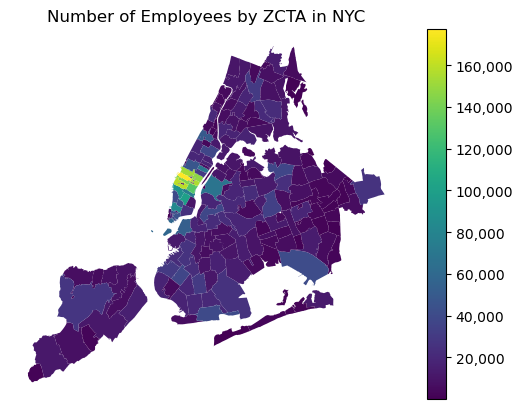

In [42]:
# plot number of employees by zcta in nyc
fig, ax = plt.subplots(1, 1)
cbp_geo.plot(column = "EMP", ax=ax, legend = True).ticklabel_format(useOffset=True)
ax.axis('off')
ax.set_title("Number of Employees by ZCTA in NYC")

# Get colourbar from second axis
colourbar = ax.get_figure().get_axes()[1]
# get yticks
yticks = colourbar.get_yticks()
# Apply some function f to each tick, where f can be your percentage conversion
colourbar.set_yticklabels([f"{str(ytick)[:-5]},000" for ytick in yticks])